# 实现k近邻算法进行分类与回归

In [2]:
import pandas as pd
names =['label','a1','a2','a3','a4','a5','a6','a7','a8','a9','a10','a11','a12','a13']
dataset = pd.read_csv('D:\s\wine.data',names=names)
print(dataset)

AttributeError: module 'numpy' has no attribute '__version__'

In [83]:
data = dataset.iloc[:, range(1,14)]
target = dataset.iloc[:,0]
data 

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


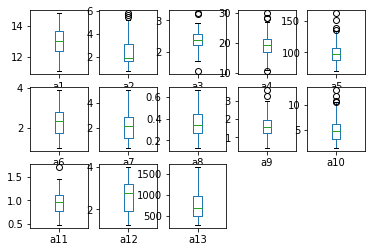

In [84]:
import matplotlib.pyplot as plt
data.plot(kind='box',subplots=True, layout=(3,5),sharex=False,sharey=False)
plt.show()

a 1 中异常值为 []
a 2 中异常值为 [5.8  5.51 5.65]
a 3 中异常值为 [1.36 3.22 3.23]
a 4 中异常值为 [10.6 30.  28.5 28.5]
a 5 中异常值为 [151. 139. 136. 162.]
a 6 中异常值为 []
a 7 中异常值为 []
a 8 中异常值为 []
a 9 中异常值为 [3.28 3.58]
a 10 中异常值为 [10.8  13.   11.75 10.68]
a 11 中异常值为 [1.71]
a 12 中异常值为 []
a 13 中异常值为 []


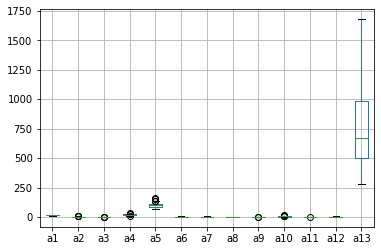

In [85]:
p = data.boxplot(return_type='dict')
for i in range(13):
    y = p['fliers'][i].get_ydata()
    print('a',i+1,'中异常值为',y)

In [86]:
from sklearn import preprocessing
names =['label','a1','a2','a3','a4','a5','a6','a7','a8','a9','a10','a11','a12','a13']
dataset = pd.read_csv('D:\s\wine-clean.data',names=names)
print(dataset)

     label     a1    a2    a3    a4     a5    a6    a7    a8    a9    a10  \
0        1  14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29   5.64   
1        1  13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28   4.38   
2        1  13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81   5.68   
3        1  14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18   7.80   
4        1  13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82   4.32   
..     ...    ...   ...   ...   ...    ...   ...   ...   ...   ...    ...   
173      3  13.71  3.21  2.45  20.5   95.0  1.68  0.61  0.52  1.06   7.70   
174      3  13.40  3.91  2.48  23.0  102.0  1.80  0.75  0.43  1.41   7.30   
175      3  13.27  4.28  2.26  20.0  120.0  1.59  0.69  0.43  1.35  10.20   
176      3  13.17  2.59  2.37  20.0  120.0  1.65  0.68  0.53  1.46   9.30   
177      3  14.13  4.10  2.74  24.5   96.0  2.05  0.76  0.56  1.35   9.20   

      a11   a12   a13  
0    1.04  3.92  1065  
1    1.05  3.40  1050  
2  

In [87]:
data = dataset.iloc[:,range(1,14)]
target = dataset.iloc[:,0].values.reshape(1,178)[0]
print(type(target),target)

<class 'numpy.ndarray'> [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [88]:
cdata = preprocessing.StandardScaler().fit_transform(data)
cdata

array([[ 1.51861254, -0.56906261,  0.26105088, ...,  0.39346131,
         1.83381234,  1.01300893],
       [ 0.24628963, -0.50234086, -0.90869274, ...,  0.43875109,
         1.10735109,  0.96524152],
       [ 0.19687903,  0.05049647,  1.22911457, ...,  0.34817153,
         0.7860317 ,  1.39514818],
       ...,
       [ 0.33275817,  1.88057869, -0.4246609 , ..., -1.64457872,
        -1.46320409,  0.28057537],
       [ 0.20923168,  0.26972507,  0.01903496, ..., -1.59928894,
        -1.37938164,  0.29649784],
       [ 1.39508604,  1.70900848,  1.51146647, ..., -1.55399916,
        -1.40732245, -0.59516041]])

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [90]:
x,y = cdata,target
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
x_train.shape

(133, 13)

In [1]:
k_range = range(1,15)
k_error = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model,x,y,cv=5,scoring='accuracy')
    k_error.append(1-scores.mean())

NameError: name 'KNeighborsClassifier' is not defined

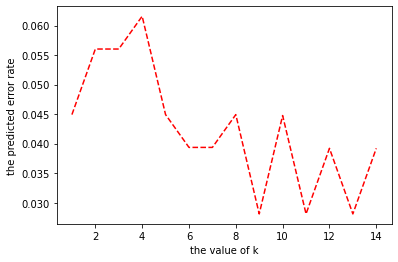

In [92]:
plt.plot(k_range,k_error,'r--')
plt.xlabel('the value of k')
plt.ylabel('the predicted error rate')
plt.show()

In [93]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train,y_train)
pred = model.predict(x_test)
ac = accuracy_score(y_test,pred)
print('k=9模型的准确率是:',ac)
print('测试集的预测标签值为:',pred)
print('测试集真实的标签值为',y_test)

k=9模型的准确率是: 0.9555555555555556
测试集的预测标签值为: [1 3 2 1 2 1 1 3 2 2 3 3 1 2 3 2 1 1 3 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1 3
 2 2 3 1 1 2 2 2]
测试集真实的标签值为 [1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1 3
 2 2 3 1 1 2 2 2]


# 若未进行预处理对比

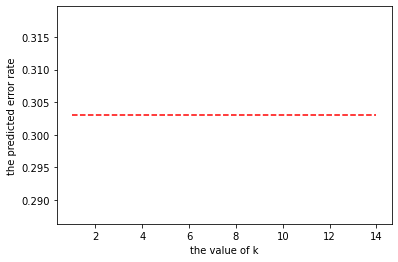

In [98]:
data = dataset.iloc[:,range(1,14)]
target = dataset.iloc[:,0].values.reshape(1,178)[0]
x,y = data,target
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
k_range = range(1,15)
k_error = []
for k in k_range:
    model1 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model,x,y,cv=5,scoring='accuracy')
    k_error.append(1-scores.mean())
plt.plot(k_range,k_error,'r--')
plt.xlabel('the value of k')
plt.ylabel('the predicted error rate')
plt.show()

In [99]:
from sklearn.metrics import accuracy_score
model1 = KNeighborsClassifier(n_neighbors=9)
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
ac = accuracy_score(y_test,pred)
print('k=9模型的准确率是:',ac)
print('测试集的预测标签值为:',pred)
print('测试集真实的标签值为',y_test)

k=9模型的准确率是: 0.7111111111111111
测试集的预测标签值为: [1 2 2 1 2 2 1 3 2 2 1 2 1 3 1 2 1 1 2 1 2 1 2 3 3 2 2 2 3 3 1 1 3 1 1 1 3
 2 2 1 3 1 2 3 2]
测试集真实的标签值为 [1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1 3
 2 2 3 1 1 2 2 2]
